<a href="https://colab.research.google.com/github/farisikhhaq/PCVK_2022/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah Tingkat kecerahan citra 
 -------------------------------- 
Masukan nilai kecerahan: 30


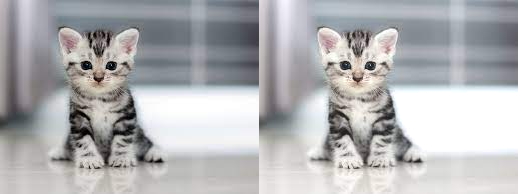

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 

print(' Mengubah Tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/image/kitten01.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1. Implementasikan transformasi contrast pada Google Colaboratory menggunakan 
formula yang terdapat pada bagian Ulasan Teori


 mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukan nilai kecerahan: 30
Masukan nilai contrast : 2.0


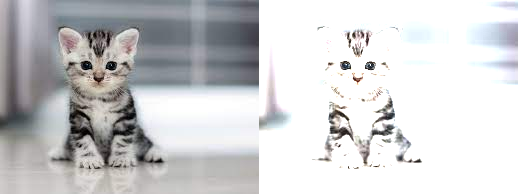

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
2

print(' mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
  contrast = float(input('Masukan nilai contrast : '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/image/kitten01.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness, 0, 255)


final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi logarithmic brightness pada Google Colaboratory 
menggunakan formula yang terdapat pada bagian Ulasan Teori

 mengubah tingkat kecerahan citra 
 -------------------------------- 
Masukan nilai kecerahan: 30


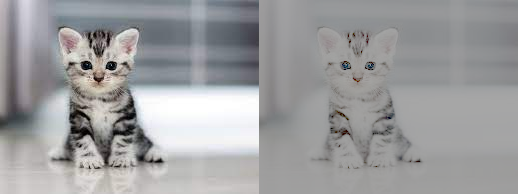

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt 

print(' mengubah tingkat kecerahan citra ')
print(' -------------------------------- ')

try:
  brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
  print('Error, bukan angka')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/image/kitten01.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(np.log(1.0+original[y,x,c])*brightness, 0, 255)

#cara simple tanpa loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, 
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada 
bagian Ulasan Teori

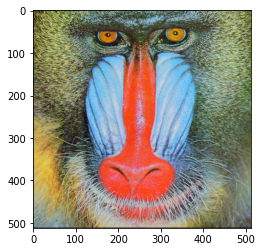

In [ ]:
img_cek = cv.imread('/content/drive/MyDrive/PCVK_MM/image/mandrill.tiff')
img_rgb = cv.cvtColor(img_cek,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

Averaging

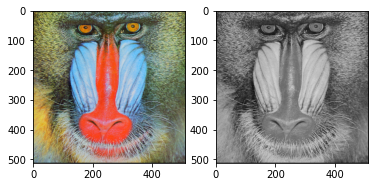

In [ ]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK_MM/image/mandrill.tiff')
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

Lightness

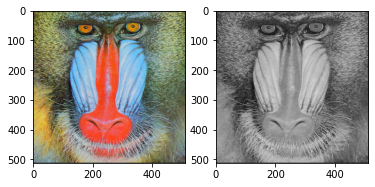

In [ ]:
img_light = cv.imread('/content/drive/MyDrive/PCVK_MM/image/mandrill.tiff')
img_light[:] = np.max(img_light,axis=-1,keepdims=10)/2+np.min(img_light,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_light)

Luminance

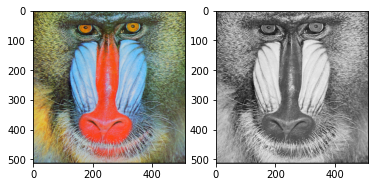

In [ ]:
image_lum = cv.imread('/content/drive/MyDrive/PCVK_MM/image/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

 4. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, 
tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna 
merah menjadi grayscale

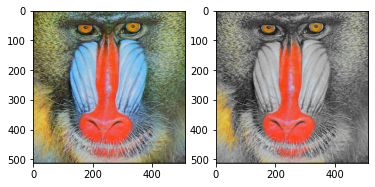

In [ ]:
image_last = cv.imread('/content/drive/MyDrive/PCVK_MM/image/mandrill.tiff')
ret, mask = cv.threshold(image_last[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(image_last)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(image_last, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')